### Step 1: Import Required Libraries ###

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline



### Step 2: Load and Explore the California Housing Dataset ###

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup   

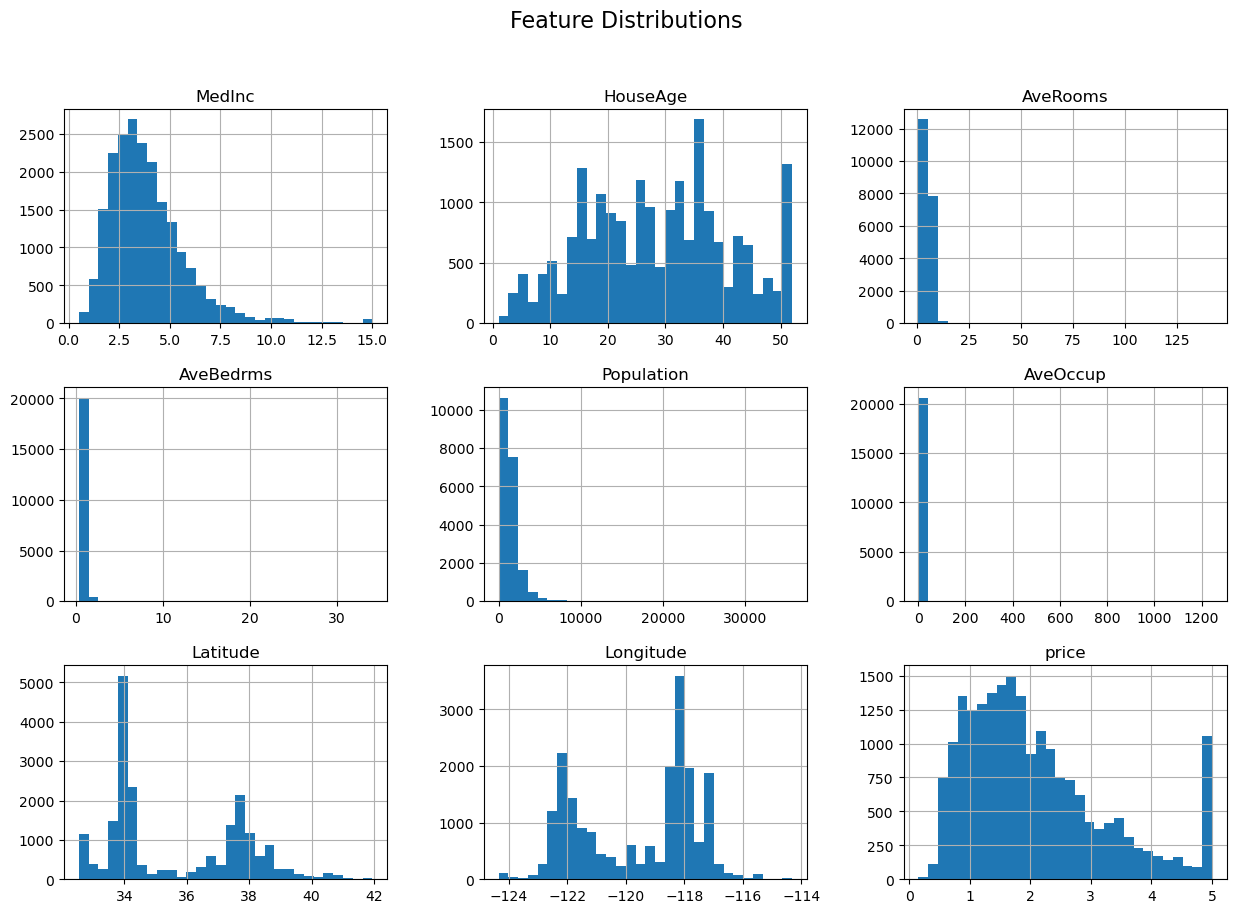

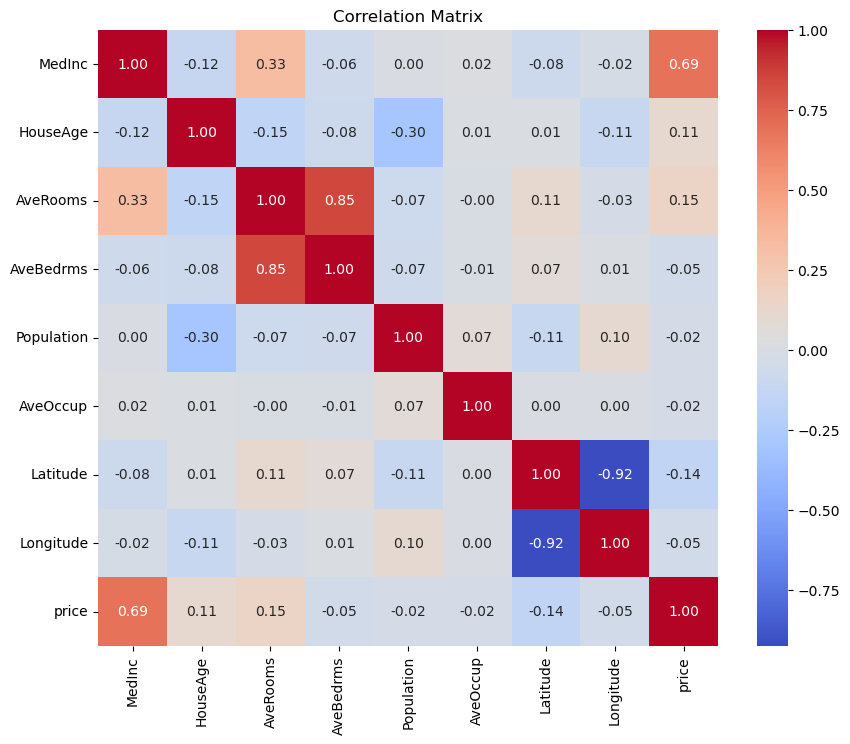

In [3]:
# Load California housing data
california_data = fetch_california_housing(as_frame=True)
X = california_data.data
y = california_data.target

# Combine features and target into a single DataFrame
data = pd.concat([X, y.rename("price")], axis=1)

# Check the first few rows
print(data.head())

# Dataset info
print(data.info())

# Summary statistics
print(data.describe())
# Plot histograms of all features
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


### Step 3: Preprocessing: Scaling Features ###

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier analysis
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


### Step 4: Dimensionality Reduction with PCA ###

Explained Variance Ratio: [0.25336868 0.23516245]


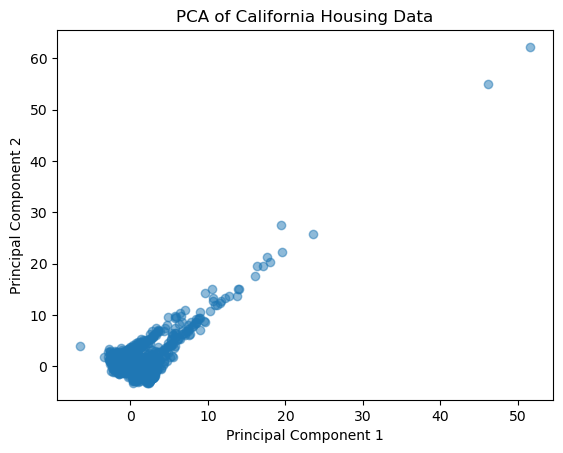

In [5]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of California Housing Data')
plt.show()


### Step 5: Clustering with K-Means ###

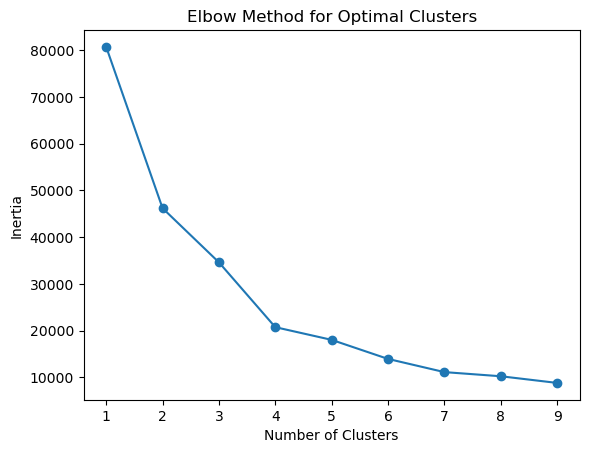

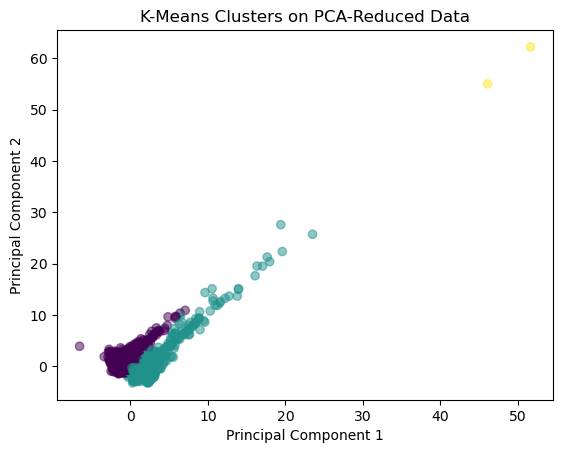

In [6]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Fit K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters on PCA-Reduced Data')
plt.show()


### Step 6: Feature Engineering: Add Cluster Labels ###

In [7]:
# Add cluster labels to the original DataFrame
data['Cluster'] = clusters


### Step 7: Split Data for Linear Regression ###

In [8]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Verify splits
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (16512, 8), Test set: (4128, 8)


### Step 8: Train Linear Regression Model ###

In [9]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Coefficients: [ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682]
Intercept: 2.067862309508389


### Step 9: Evaluate the Model ###

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Absolute Error: 0.5332001304956565
Mean Squared Error: 0.555891598695244
R-squared: 0.5757877060324511


### 10: Visualization: Actual vs Predicted Prices ###

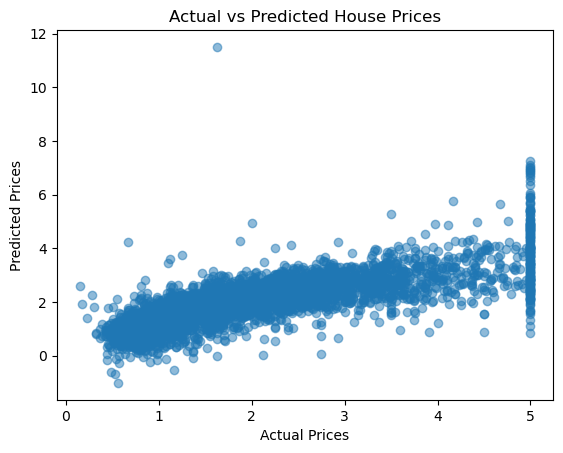

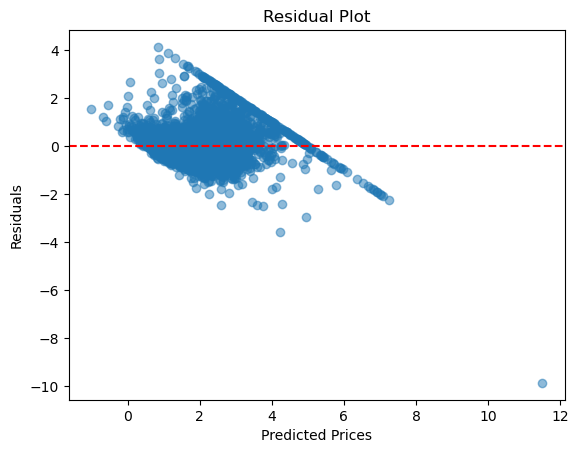

In [12]:
# Scatter plot: Actual vs Predicted Prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


### 11: Cluster Analysis on Price ###

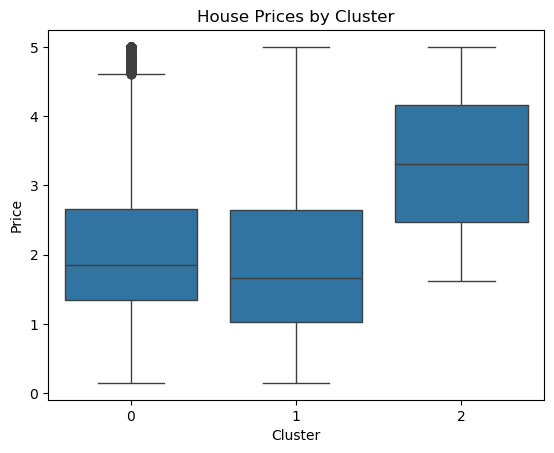

In [13]:
# Boxplot of price by cluster
sns.boxplot(x='Cluster', y='price', data=data)
plt.title('House Prices by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.show()